# Python Workshop 9/22

Note to instructors:

Jupyter uses Markdown to format text in the cells. [Here's](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) a good cheat sheet to show how to comment on here. 

In order to get it on your laptop, make sure you have Python install and install it via pip
`pip install jupyter`. The packages we'll need for this tutorial are `numpy`, `pandas`, and `seaborn` so use pip to install those as well. Once you have those install, run `jupyter notebook` in your terminal and click the link it provides if it doesn't automatically open in your browser. [Here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html) is an overview of some of the basic functionality of jupyter notebooks and how to navigate.

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Basic

## Variable assignment

In [3]:
2 + 2

4

In [5]:
x = 2 + 2

In [6]:
x

4

In [8]:
x + 3

7

## Data Types

Continue adding basics from powerpoint...

## Functions

## Lists

## Pandas

Pandas is a powerful python library used for data analysis. Here we will go over only the basics where we'll try to summarize data and create some plots

Here I'm just creating random data but once we find data we want to use we'll import it
`df = pd.read_csv('path/to/data')`

In [22]:
df = pd.DataFrame({"continuous": np.random.rand(10), "category": np.random.choice(['A', 'B', 'C'], 10, replace=True)}) 

We saw above that lists contain numbers, or more generally, lists contain data that we want to manipulate. Pandas introduces dataframes which we'll instead use to store the data we work with. They look like tables like this:

In [23]:
df

,category,continuous
0,B,0.249876
1,C,0.670012
2,A,0.912004
3,C,0.193659
4,B,0.784831
5,C,0.227797
6,B,0.850608
7,B,0.875328
8,C,0.992864
9,B,0.871596


We can take the mean and standard deviation to summarize the data. The mean is like the average value which is pretty much describing what value the data is close to. For example, if for one week Julie studies 5 hours on Monday, 4 on Tuesday, 3 on Wednesday, 3 on Thursday and 0 on Friday. The mean would be 5 + 4 + 3 + 3 + 0/ 5 = 3 so on average Julie studied 3 hours per day that week. The standard deviation measures how dispersed the data is. Going back to the example for Julie, if she had studied 3 hours consistently each day instead, there would be no dispersion in the data since the values are all the same so the standard deviation is 0.

We can select data using the syntax with the name of the column you want to select in square brackets: ["column name"]. Note that it's case sensitive so you must type in the column name exactly how it's displayed

In [24]:
df["continuous"].mean()

0.6628573928949496

In [25]:
df["continuous"].std()

0.3144397477690069

## Plotting with Pandas
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

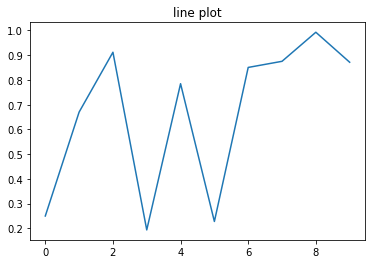

In [27]:
df["continuous"].plot(kind='line', title='line plot', x='time', y='value')

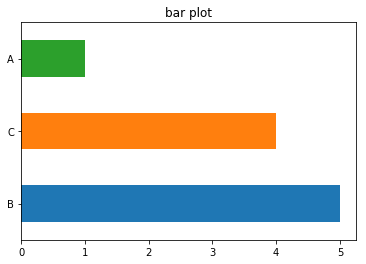

In [33]:
df["category"].value_counts().plot(kind='barh', title='bar plot', x='category', y='count')